**Preparasi Data Dan Library**

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/TugasMachineLearningLAST/smokingdata/smoking.csv")
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [4]:
# Melihat Shape Pada Dataset
df.shape


(55692, 27)

In [5]:
#Cek Data Type Dan Menunjukkan Semua Kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
# Melihat Deskripsi Dataset (Count, mean, std, min, max)
df.describe().round(2)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,...,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,27845.50,44.18,164.65,65.86,82.05,1.01,1.01,1.03,1.03,121.49,...,57.29,114.96,14.62,1.09,0.89,26.18,27.04,39.95,0.21,0.37
std,16077.04,12.07,9.19,12.82,9.27,0.49,0.49,0.16,0.16,13.68,...,14.74,40.93,1.56,0.40,0.22,19.36,30.95,50.29,0.41,0.48
min,0.00,20.00,130.00,30.00,51.00,0.10,0.10,1.00,1.00,71.00,...,4.00,1.00,4.90,1.00,0.10,6.00,1.00,1.00,0.00,0.00
25%,13922.75,40.00,160.00,55.00,76.00,0.80,0.80,1.00,1.00,112.00,...,47.00,92.00,13.60,1.00,0.80,19.00,15.00,17.00,0.00,0.00
50%,27845.50,40.00,165.00,65.00,82.00,1.00,1.00,1.00,1.00,120.00,...,55.00,113.00,14.80,1.00,0.90,23.00,21.00,25.00,0.00,0.00
75%,41768.25,55.00,170.00,75.00,88.00,1.20,1.20,1.00,1.00,130.00,...,66.00,136.00,15.80,1.00,1.00,28.00,31.00,43.00,0.00,1.00
max,55691.00,85.00,190.00,135.00,129.00,9.90,9.90,2.00,2.00,240.00,...,618.00,1860.00,21.10,6.00,11.60,1311.00,2914.00,999.00,1.00,1.00


In [7]:
# check unique value
df.nunique().sort_values()

oral                       1
smoking                    2
gender                     2
dental caries              2
hearing(left)              2
hearing(right)             2
tartar                     2
Urine protein              6
height(cm)                13
age                       14
eyesight(right)           17
eyesight(left)            19
weight(kg)                22
serum creatinine          38
relaxation                95
HDL                      126
systolic                 130
hemoglobin               145
AST                      219
ALT                      245
fasting blood sugar      276
Cholesterol              286
LDL                      289
triglyceride             390
Gtp                      488
waist(cm)                566
ID                     55692
dtype: int64

**VISUALISASI DATA**

Visualisasi data gender (persentase berdasarkan gender)

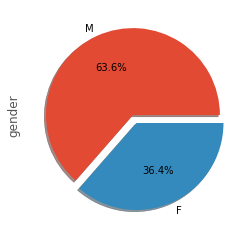

In [8]:
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

Visualisasi data perokok berdasarkan gender

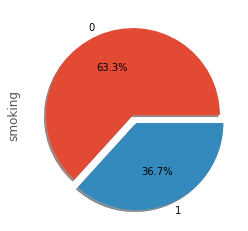

In [9]:


df['smoking'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

Melihat distribusi atau penyebaran data menggunakan Boxplot

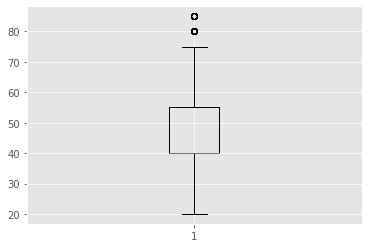

In [10]:
# boxplot for show describe age 

plt.boxplot(df["age"])
plt.show()


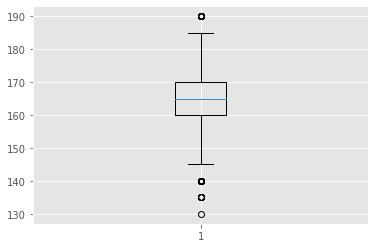

In [11]:
# boxplot for show describe height 

plt.boxplot(df["height(cm)"])
plt.show()

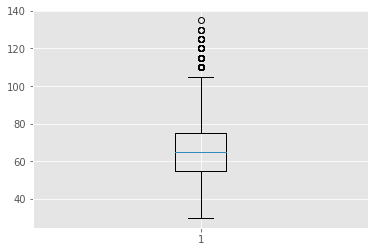

In [12]:
# boxplot for show describe weight 

plt.boxplot(df["weight(kg)"])
plt.show()

In [13]:
#make groupby to show the average age smoking

ag=df.groupby("smoking")["age"].mean()
ag

smoking
0    45.677981
1    41.607431
Name: age, dtype: float64

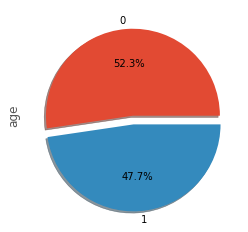

In [14]:
# graph average age smoking
ag.plot(kind="pie",explode=[0,0.1],autopct='%1.1f%%',shadow=True)

In [15]:
# group by for show the average age , weight and height by the gender

summary=df.groupby(["gender","smoking"])["age","weight(kg)","height(cm)"].mean().round(0)
summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


age  weight(kg)  height(cm)
gender smoking                              
F      0        49.0        56.0       156.0
       1        46.0        56.0       157.0
M      0        42.0        71.0       170.0
       1        41.0        72.0       170.0

In [16]:
# looking the shape DataSet
df.shape

(55692, 27)

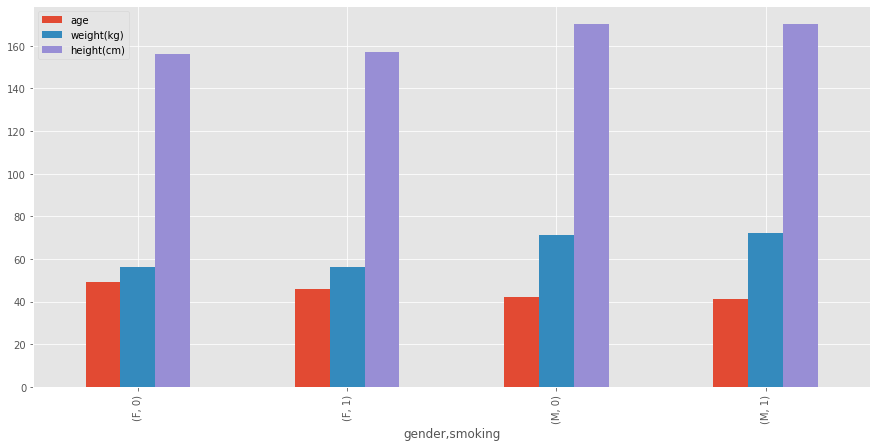

In [17]:
# graph the group by

summary.plot(kind="bar",figsize=(15,7))

**Membuat Model Machine Learning Dan Melihat Skor Akurasi Klasifikasi**

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

In [19]:
# show the data set
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [20]:
#show the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [21]:
# change datatype column gender 

le = LabelEncoder()
le.fit(df["gender"])
df["gender"]=le.transform(df["gender"])  

# change datatype column oral 

l = LabelEncoder()
l.fit(df["oral"])
df["oral"]=l.transform(df["oral"])

# change datatype column tartar 


a = LabelEncoder()
a.fit(df["tartar"])
df["tartar"]=a.transform(df["tartar"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [23]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [24]:
# drop column ID , I don`t need this column
df.drop(columns="ID",inplace=True)

In [25]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0


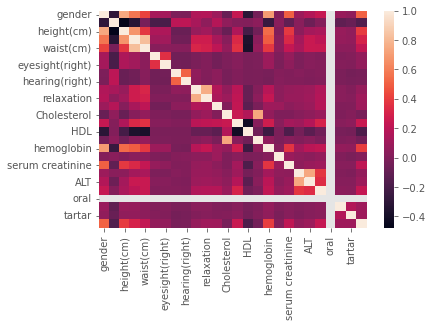

In [26]:
sns.heatmap(df.corr())

In [27]:
#Defined X value and y value , and split the data train
X = df.drop(columns="smoking")           
y = df["smoking"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (41769, 25)
X Test  :  (13923, 25)
Y Train :  (41769,)
Y Test  :  (13923,)


In [28]:
#Defined object from library classification 

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier(n_estimators=150)
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
XGB = XGBClassifier()
SVR=SVC()

In [31]:
# make for loop for classification 
from sklearn.metrics import classification_report
li = [LR,DTR,RFR,KNR,MLP,KNR,XGB,SVR]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})
for j in li:
    j.fit(X_train,y_train)
    ypred = j.predict(X_test)
    print(j,":",classification_report(y_test,ypred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression() : 70.56668821374704
DecisionTreeClassifier() : 77.86396609926022
RandomForestClassifier(n_estimators=150) : 82.86288874524169
KNeighborsClassifier() : 70.08547008547008
MLPClassifier() : 74.29433311786254
KNeighborsClassifier() : 70.08547008547008
XGBClassifier() : 75.83135818429936
SVC() : 72.54901960784314


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression() :               precision    recall  f1-score   support

           0       0.74      0.82      0.78      8772
           1       0.62      0.52      0.57      5151

    accuracy                           0.71     13923
   macro avg       0.68      0.67      0.67     13923
weighted avg       0.70      0.71      0.70     13923

DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       0.83      0.83      0.83      8772
           1       0.71      0.71      0.71      5151

    accuracy                           0.78     13923
   macro avg       0.77      0.77      0.77     13923
weighted avg       0.78      0.78      0.78     13923

RandomForestClassifier(n_estimators=150) :               precision    recall  f1-score   support

           0       0.87      0.85      0.86      8772
           1       0.75      0.79      0.77      5151

    accuracy                           0.83     13923
   macro avg       0.81      0.82  

In [51]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

ypred = rf.predict(X_test)

print("Score the X-train with Y-train is : ", rf.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", rf.score(X_test,y_test))
print("Accuracy Score :",accuracy_score(y_test,ypred)*100)

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.8244631185807656
Accuracy Score : 82.44631185807656


Feature yang penting pada model

Text(0.5, 0, 'Feature Importance')

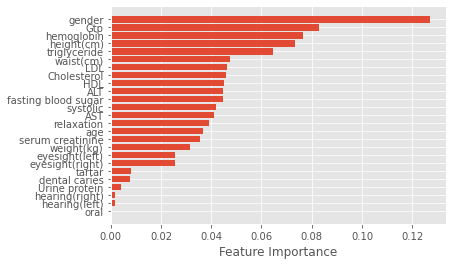

In [52]:

sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
# inputs = tf.keras.Input(shape=(61,))
# x = tf.keras.layers.Dense(64, activation='relu')(inputs)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# model = tf.keras.Model(inputs, outputs)
# model.evaluate(X_test, y_test)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      8772
           1       0.66      0.53      0.59      5151

    accuracy                           0.73     13923
   macro avg       0.71      0.69      0.69     13923
weighted avg       0.72      0.73      0.72     13923

